In [ ]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Load Dataset

Contoh Data Awal:


,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,close,broad,black,enlarging,club,smooth,smooth,white,white,white,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
4,edible,convex,smooth,gray,no,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,brown,abundant,grasses


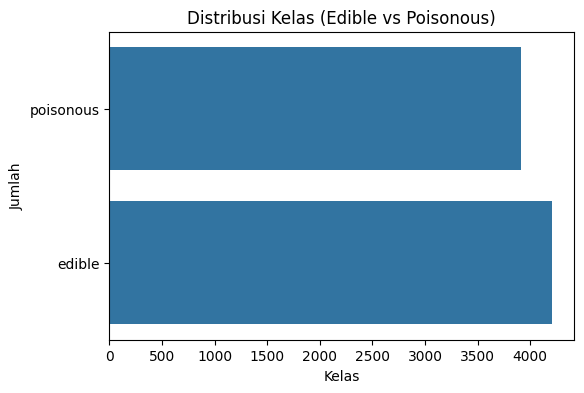

In [ ]:
# Load Dataset dari URL
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"
data = pd.read_csv(url, sep=';')
print("Contoh Data Awal:")
display(data.head())

# Visualisasi distribusi target class
plt.figure(figsize=(6,4))
sns.countplot(data['class'])
plt.title("Distribusi Kelas (Edible vs Poisonous)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

TAHAP EDA / PREPROCESSING -- DATVIS

In [ ]:
# MELIHAT ADA DATA KOSONG ATAU TIDAK
print("Jumlah data kosong tiap kolom:")
print(data.isnull().sum())

# MERUBAH HURUF MENJADI ANGKA
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# SEBELUM DI HAPUS YANG DUPLIKAT
print(f"Jumlah data sebelum menghapus duplikat: {data.shape[0]}")

# MENGHAPUS DUPLIKAT
data.drop_duplicates(inplace=True)

# SETELAH DI HAPUS
print(f"Jumlah data setelah menghapus duplikat: {data.shape[0]}")

# HAPUS KOLOM YANG TERLALU BERPENGARUH
data.drop(columns=['gill-spacing', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring','spore-print-color', 'gill-color','stalk-color-below-ring', 'stalk-color-above-ring'], inplace=True)



# MEMISAHKAN FITUR DAN TARGET (MENJADIKAN CLASS SEBAGAI TARGET)
X = data.drop(columns=['class'])
y = data['class']

display(data.head())

# data


Jumlah data kosong tiap kolom:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Jumlah data sebelum menghapus duplikat: 8124
Jumlah data setelah menghapus duplikat: 6554


,class,cap-shape,cap-surface,cap-color,bruises,stalk-shape,stalk-root,veil-color,population,habitat
0,1,2,3,0,0,0,3,2,3,4
1,0,2,3,9,0,0,2,2,2,0
2,0,0,3,8,0,0,2,2,2,2
3,1,2,2,8,0,0,3,2,3,4
4,0,2,3,3,1,1,3,2,0,0


In [ ]:
pd.DataFrame(y).head()

,class
0,1
1,0
2,0
3,1
4,0


In [ ]:
# Membagi data menjadi data training dan data testing
# Data untuk testing 20%, data untuk training 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# Inisiasi Model

model = RandomForestClassifier(
    n_estimators=10, # Mengurangi jumlah estimator
    max_depth=4,  # Mengurangi kedalaman pohon
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Training model dengan .fit()
model.fit(X_train, y_train)
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)

population     0.233742
stalk-root     0.218297
bruises        0.196548
habitat        0.189659
stalk-shape    0.083827
cap-color      0.023457
cap-shape      0.023204
cap-surface    0.018084
veil-color     0.013183
dtype: float64


In [ ]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

,class
1541,0
1050,0
4280,1
1062,0
6777,1
...,...
3717,0
3635,1
2345,0
4149,1


In [ ]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
1541,0,0
1050,0,0
4280,1,1
1062,0,0
6777,1,1
...,...,...
3717,0,0
3635,1,1
2345,0,0
4149,1,1


<Figure size 600x600 with 0 Axes>

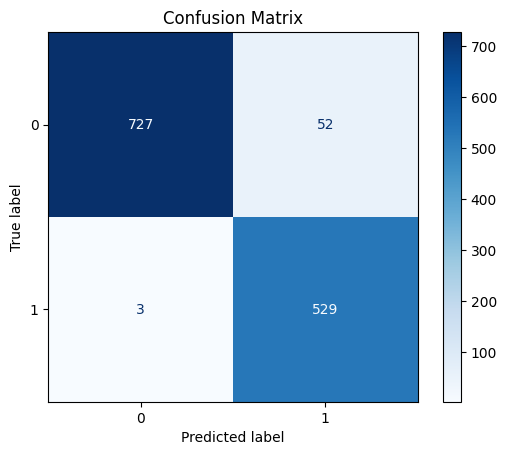

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# Confusion Matrix Visual
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()




accuracy_score 0.958047292143402
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.93      0.99      0.96      0.96      0.92       779
          1       0.91      0.99      0.93      0.95      0.96      0.93       532

avg / total       0.96      0.96      0.97      0.96      0.96      0.93      1311



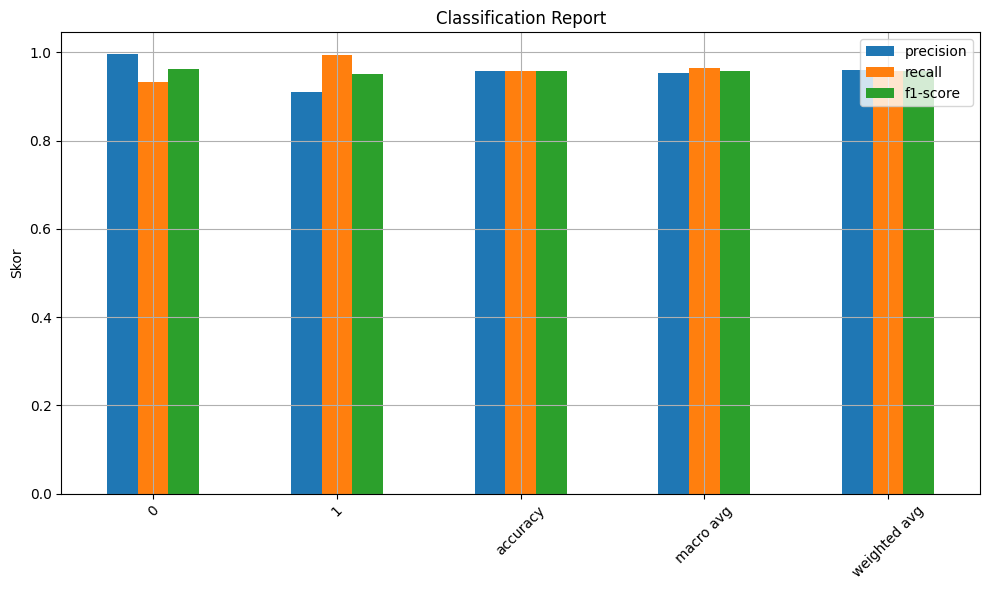

In [ ]:
# Evaluasi Kinerja
print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(classification_report_imbalanced(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Hanya ambil precision, recall, f1-score
report_df = report_df[['precision', 'recall', 'f1-score']]

report_df.plot(kind='bar', figsize=(10,6))
plt.title("Classification Report")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder

# URL dataset
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"

# ==============================================================================
#           >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN (LABEL INDONESIA) <<
# ==============================================================================

# Baca data asli
# Use the correct delimiter and let pandas infer headers
original_df = pd.read_csv(url, sep=';')


# Kolom fitur (gantilah sesuai dataset kamu)
columns = [
    'cap-shape', 'cap-color','cap-surface', 'bruises',
    'stalk-shape', 'stalk-root',
    'veil-color', 'population', 'habitat'
]


# Label kolom dalam Bahasa Indonesia
label_indonesia = {
    'cap-shape': 'Bentuk Tudung',
    'cap-color': 'Warna Tudung',
    'cap-surface': 'Permukaan Tudung',
    'bruises': 'Memar',
    'stalk-shape': 'Bentuk Batang',
    'stalk-root': 'Akar Batang',
    'veil-color': 'Warna Selubung',
    'population': 'Populasi',
    'habitat': 'Habitat',
}

# Mapping nilai fitur ke Bahasa Indonesia
opsi_mapping = {
    'cap-shape': {'bell': 'Lonceng', 'conical': 'Kerucut', 'convex': 'Cembung', 'flat': 'Datar', 'knobbed': 'Tonjolan', 'sunken': 'Cekung'},
    'cap-surface': {'fibrous': 'Berserat', 'groovesmooth': 'Beralur', 'scaly': 'Bersisik', 'smooth': 'Halus'},
    'cap-color': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'green': 'Hijau', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'bruises': {'bruises': 'Ya', 'no': 'Tidak'},
    'stalk-shape': {'enlarging': 'Membesar', 'tapering': 'Mengecil'},
    'stalk-root': {'?': '?', 'bulbous': 'Menggelmbung', 'club': 'Tongkat', 'equal': 'Sama Besar', 'rooted': 'Berakar Kuat'},
    'veil-color': {'brown': 'Coklat', 'orange': 'Oranye', 'white': 'Putih', 'yellow': 'Kuning'},
    'population': {'abundant': 'Sangat Banyak', 'clustered': 'Bergerombol', 'numerous': 'Banyak', 'scattered': 'Tersebar', 'several': 'Beberapa', 'solitary': 'Sendirian'},
    'habitat': {'grasses': 'Rerumputan', 'leaves': 'Dedaunan', 'meadows': 'Padang Rumput', 'paths': 'Jalan Setapak', 'urban': 'Perkotaan', 'waste': 'Tempat Sampah', 'woods': 'Hutan'},
}

# Dictionary untuk widget dropdown
input_widgets = {}

print("Silakan pilih karakteristik jamur di bawah ini:")

# Buat dropdown berdasarkan kolom
for col in columns: # Iterate through the selected columns
    options = sorted(original_df[col].unique())
    if col in opsi_mapping:
        # Create mapped options, ensuring all original options have a mapping
        mapped_options = [(opsi_mapping[col].get(opt, opt), opt) for opt in options]
    else:
        mapped_options = [(opt, opt) for opt in options]

    input_widgets[col] = widgets.Dropdown(
        options=mapped_options,
        description=label_indonesia.get(col, col),
        disabled=False,
        layout=widgets.Layout(width='50%')
    )
    display(input_widgets[col])

# ==============================================================================
#           >> TOMBOL PREDIKSI <<
# ==============================================================================

button = widgets.Button(description="🔍 Prediksi Sekarang!")
output = widgets.Output()

# Asumsikan model sudah dimuat sebelumnya ke variabel `model`
def on_button_clicked(b):
    with output:
        clear_output()

        # Ambil nilai dari dropdown
        user_input = {}
        for col, widget in input_widgets.items():
            user_input[col] = widget.value

        # Ubah menjadi DataFrame
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Lakukan encoding
        for col in columns:
            le = LabelEncoder().fit(original_df[col])
            try:
                input_df_encoded[col] = le.transform(input_df_raw[col])
            except ValueError as e:
                print(f"⚠️ Error saat encoding kolom {col}: {e}")
                print(f"Value causing error in {col}: {input_df_raw[col].iloc[0]}")
                return

        # Pastikan urutan kolom sesuai dengan data pelatihan
        input_df_encoded = input_df_encoded[X.columns]

        # Prediksi dan probabilitas
        prediction = model.predict(input_df_encoded)
        probabilities = model.predict_proba(input_df_encoded)[0]  # hanya satu data, jadi ambil indeks 0

        edible_prob = probabilities[0] * 100  # diasumsikan 0 = edible
        poisonous_prob = probabilities[1] * 100

        hasil = '✅ **Bisa Dimakan (Edible)**' if prediction[0] == 0 else '⚠️ **Beracun (Poisonous)**'

        # Tampilkan hasil
        print("\n🎉 **HASIL PREDIKSI JAMUR** 🎉")
        print("------------------------------------------")
        print(f"Hasil prediksi berdasarkan input Anda: {hasil}")
        print(f"📊 Probabilitas bisa dimakan: {edible_prob:.2f}%")
        print(f"☠️ Probabilitas beracun: {poisonous_prob:.2f}%")
        print("------------------------------------------")


# Tampilkan tombol dan output
button.on_click(on_button_clicked)
display(button, output)

Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='Bentuk Tudung', layout=Layout(width='50%'), options=(('Lonceng', 'bell'), ('Kerucut', 'c…

Dropdown(description='Warna Tudung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Coklat Kekuni…

Dropdown(description='Permukaan Tudung', layout=Layout(width='50%'), options=(('Berserat', 'fibrous'), ('Beral…

Dropdown(description='Memar', layout=Layout(width='50%'), options=(('Ya', 'bruises'), ('Tidak', 'no')), value=…

Dropdown(description='Bentuk Batang', layout=Layout(width='50%'), options=(('Membesar', 'enlarging'), ('Mengec…

Dropdown(description='Akar Batang', layout=Layout(width='50%'), options=(('?', '?'), ('Menggelmbung', 'bulbous…

Dropdown(description='Warna Selubung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Oranye', 'o…

Dropdown(description='Populasi', layout=Layout(width='50%'), options=(('Sangat Banyak', 'abundant'), ('Bergero…

Dropdown(description='Habitat', layout=Layout(width='50%'), options=(('Rerumputan', 'grasses'), ('Dedaunan', '…

Button(description='🔍 Prediksi Sekarang!', style=ButtonStyle())

Output()

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder

# URL dataset
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"

# ============================================================================== #
#     >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN (LABEL INDONESIA) <<     #
# ============================================================================== #

# Baca data asli
original_df = pd.read_csv(url, sep=';')

# Kolom fitur yang digunakan
columns = [
    'cap-shape', 'cap-color', 'cap-surface', 'bruises',
    'stalk-shape', 'stalk-root',
    'veil-color', 'population', 'habitat'
]

# Label kolom dalam Bahasa Indonesia
label_indonesia = {
    'cap-shape': 'Bentuk Tudung',
    'cap-color': 'Warna Tudung',
    'cap-surface': 'Permukaan Tudung',
    'bruises': 'Memar',
    'stalk-shape': 'Bentuk Batang',
    'stalk-root': 'Akar Batang',
    'veil-color': 'Warna Selubung',
    'population': 'Populasi',
    'habitat': 'Habitat',
}

# Mapping nilai fitur ke Bahasa Indonesia
opsi_mapping = {
    'cap-shape': {'bell': 'Lonceng', 'conical': 'Kerucut', 'convex': 'Cembung', 'flat': 'Datar', 'knobbed': 'Tonjolan', 'sunken': 'Cekung'},
    'cap-surface': {'fibrous': 'Berserat', 'groovesmooth': 'Beralur', 'scaly': 'Bersisik', 'smooth': 'Halus'},
    'cap-color': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'green': 'Hijau', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'bruises': {'bruises': 'Ya', 'no': 'Tidak'},
    'stalk-shape': {'enlarging': 'Membesar', 'tapering': 'Mengecil'},
    'stalk-root': {'?': '?', 'bulbous': 'Menggelmbung', 'club': 'Tongkat', 'equal': 'Sama Besar', 'rooted': 'Berakar Kuat'},
    'veil-color': {'brown': 'Coklat', 'orange': 'Oranye', 'white': 'Putih', 'yellow': 'Kuning'},
    'population': {'abundant': 'Sangat Banyak', 'clustered': 'Bergerombol', 'numerous': 'Banyak', 'scattered': 'Tersebar', 'several': 'Beberapa', 'solitary': 'Sendirian'},
    'habitat': {'grasses': 'Rerumputan', 'leaves': 'Dedaunan', 'meadows': 'Padang Rumput', 'paths': 'Jalan Setapak', 'urban': 'Perkotaan', 'waste': 'Tempat Sampah', 'woods': 'Hutan'},
}

# Buat dropdown
input_widgets = {}
print("Silakan pilih karakteristik jamur di bawah ini:")
for col in columns:
    options = sorted(original_df[col].unique())
    mapped_options = [(opsi_mapping[col].get(opt, opt), opt) for opt in options] if col in opsi_mapping else [(opt, opt) for opt in options]
    input_widgets[col] = widgets.Dropdown(
        options=mapped_options,
        description=label_indonesia.get(col, col),
        layout=widgets.Layout(width='50%')
    )
    display(input_widgets[col])

# Tombol prediksi
button = widgets.Button(description="🔍 Prediksi Sekarang!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()

        # Ambil input user
        user_input = {col: widget.value for col, widget in input_widgets.items()}
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Encoding label sesuai dataset asli
        for col in columns:
            le = LabelEncoder().fit(original_df[col])
            try:
                input_df_encoded[col] = le.transform(input_df_raw[col])
            except ValueError as e:
                print(f"⚠️ Error saat encoding kolom {col}: {e}")
                return

        # Pastikan urutan kolom sesuai dengan data pelatihan
        input_df_encoded = input_df_encoded[X.columns]

        # Prediksi probabilitas
        probabilities = model.predict_proba(input_df_encoded)[0]
        edible_prob = probabilities[0] * 100
        poisonous_prob = probabilities[1] * 100

        # Threshold 90%
        if probabilities[0] > 0.9:
            hasil = '✅ **Bisa Dimakan (Edible)**'
        else:
            hasil = '⚠️ **Beracun (Poisonous)**'

        # Tampilkan hasil
        print("\n🎉 **HASIL PREDIKSI JAMUR** 🎉")
        print("------------------------------------------")
        print(f"Hasil prediksi berdasarkan input Anda: {hasil}")
        print(f"📊 Probabilitas bisa dimakan: {edible_prob:.2f}%")
        print(f"☠️ Probabilitas beracun: {poisonous_prob:.2f}%")
        print("------------------------------------------")

# Tampilkan tombol
button.on_click(on_button_clicked)
display(button, output)


Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='Bentuk Tudung', layout=Layout(width='50%'), options=(('Lonceng', 'bell'), ('Kerucut', 'c…

Dropdown(description='Warna Tudung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Coklat Kekuni…

Dropdown(description='Permukaan Tudung', layout=Layout(width='50%'), options=(('Berserat', 'fibrous'), ('Beral…

Dropdown(description='Memar', layout=Layout(width='50%'), options=(('Ya', 'bruises'), ('Tidak', 'no')), value=…

Dropdown(description='Bentuk Batang', layout=Layout(width='50%'), options=(('Membesar', 'enlarging'), ('Mengec…

Dropdown(description='Akar Batang', layout=Layout(width='50%'), options=(('?', '?'), ('Menggelmbung', 'bulbous…

Dropdown(description='Warna Selubung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Oranye', 'o…

Dropdown(description='Populasi', layout=Layout(width='50%'), options=(('Sangat Banyak', 'abundant'), ('Bergero…

Dropdown(description='Habitat', layout=Layout(width='50%'), options=(('Rerumputan', 'grasses'), ('Dedaunan', '…

Button(description='🔍 Prediksi Sekarang!', style=ButtonStyle())

Output()

In [ ]:
import joblib

# Simpan model
joblib.dump(model, 'model.pkl')

# Download ke lokal
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>